In [1]:
from torch import nn
import matplotlib.pyplot as plt
from torchsummary import summary

import lightdde as dde
from essential import *
from qmodels import *

# Inference

In [2]:
data = dde.data.PDEData(
    domain=domain,
    pde=pde,
    bcs=[boundary_condition_u, boundary_condition_v, boundary_condition_right_p],
    exact_solution=[u_func, v_func, p_func],
    num_domain=2601,
    num_bc=400,
    num_test=5000,
)

# Models (pick one!)

## classic model

In [3]:
net = ClassicNet(in_dim=2, out_dim=3, hidden_dim=16,)

model = dde.Model(
    data=data,
    model=net,
    save_path="models/classic_1000e_tanh/",
    log_every=10,
    save_every=100,
)

model.compile()

Loaded snapshot at epoch 1000


## FNN model

In [16]:
net = FNN()

model = dde.Model(
    data=data,
    model=net,
    save_path="models/FNN_1000e_tanh/",
    log_every=100,
    save_every=100,
)

model.compile()

Loaded snapshot at epoch 1000


## quantum model

In [18]:
net = QuantumNet(in_dim=2, out_dim=3, activation=nn.SiLU)

model = dde.Model(
    data=data,
    model=net,
    save_path="models/quantum_silu/",
    log_every=20,
    save_every=10,
)

model.compile()

Loaded snapshot at epoch 1000


In [19]:
summary(net, input_size=(1, 2), device='cpu')

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
        TorchLayer-1                    [-1, 2]               0
            Linear-2                    [-1, 1]               3
           QScalar-3                    [-1, 1]               0
            Linear-4                   [-1, 10]              30
              SiLU-5                   [-1, 10]               0
            Linear-6                   [-1, 10]             110
              SiLU-7                   [-1, 10]               0
            Linear-8                    [-1, 1]              11
           CScalar-9                    [-1, 1]               0
       TorchLayer-10                    [-1, 2]               0
           Linear-11                    [-1, 1]               3
          QScalar-12                    [-1, 1]               0
           Linear-13                   [-1, 10]              30
             SiLU-14                   

# Plotting

Executed in 57.66 sec.


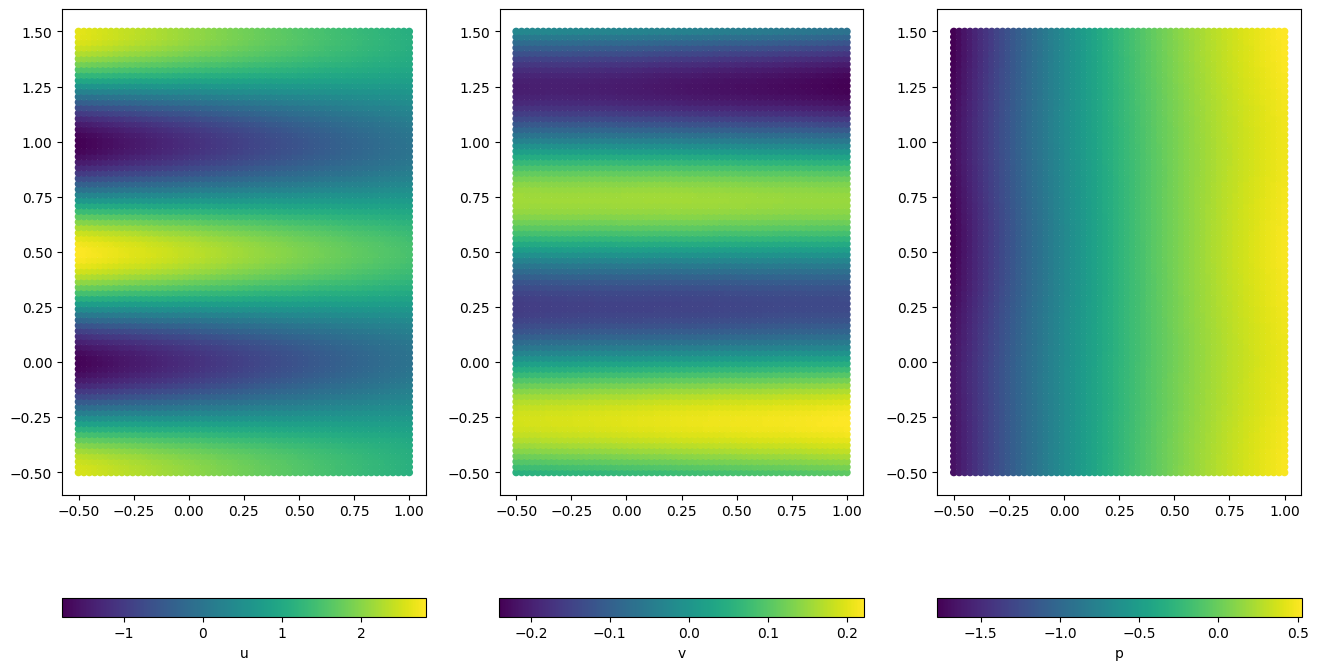

''

In [20]:
dde.scatter_plot(model, s=20)
;

# Load csv loss

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
df_q_silu = pd.read_csv("models/quantum_2000e_silu/log.csv", index_col="epoch")
df_q_relu = pd.read_csv("models/quantum_2000e_relu/log.csv", index_col="epoch")

In [14]:
df_q_silu.tail()

,loss_train,u_err,v_err,p_err
epoch,,,,
1480,0.248128,0.629252,0.145550,0.443176
1500,0.247929,0.629070,0.145603,0.442955
1520,0.247735,0.628879,0.145655,0.442736
1540,0.247546,0.628681,0.145706,0.442517
1560,0.247359,0.628475,0.145758,0.442298


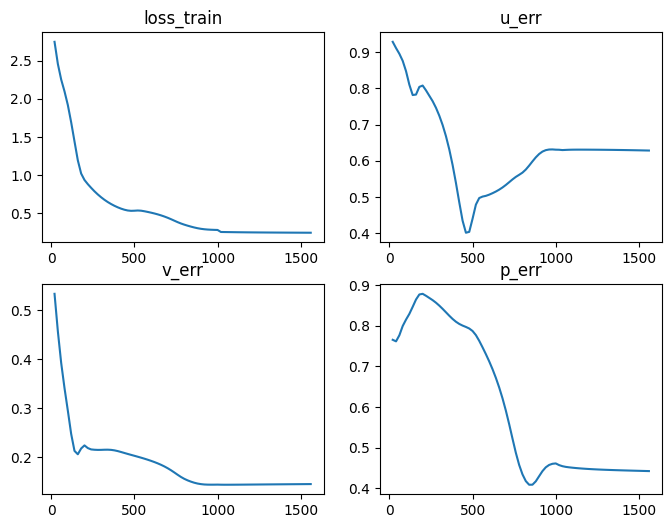

In [15]:
errs = ["loss_train", "u_err", "v_err", "p_err"]

plt.figure(figsize=(8, 6))
for i, err in enumerate(errs):
    plt.subplot(2, 2, i+1)
    plt.plot(df_q_silu.index, df_q_silu[err])
    plt.title(err)
plt.show()

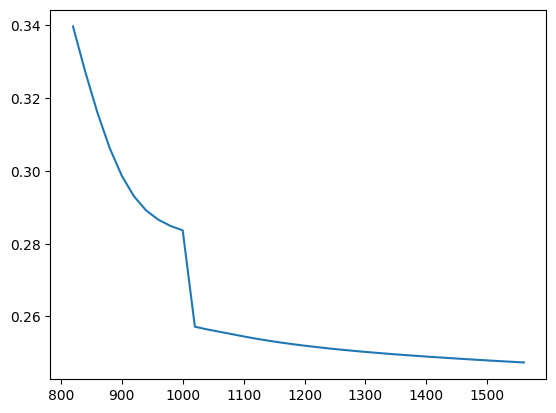

In [16]:
plt.plot(df_q_silu["loss_train"].iloc[40:])

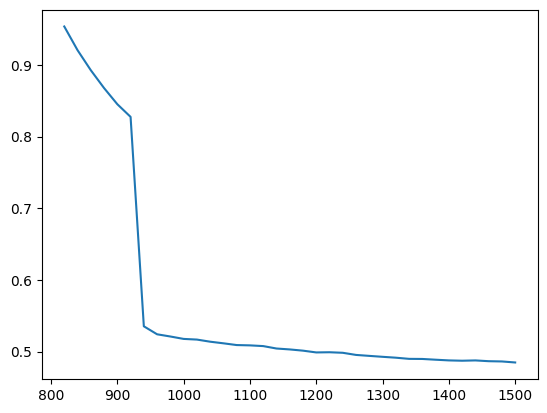

In [20]:
plt.plot(df_q_relu["loss_train"].iloc[40:75])

In [11]:
df_q["loss_train"].iloc[40:]

epoch
820     0.339679
840     0.327294
860     0.316033
880     0.306354
900     0.298675
920     0.293020
940     0.289136
960     0.286598
980     0.284875
1000    0.283665
Name: loss_train, dtype: float64

In [15]:
df_q_relu["loss_train"].iloc[40:]

epoch
820     0.953584
840     0.920552
860     0.892598
880     0.867685
900     0.845172
920     0.827480
940     0.535383
960     0.524215
980     0.521134
1000    0.517772
1020    0.516849
1040    0.513888
1060    0.511637
1080    0.509202
1100    0.508762
1120    0.507759
1140    0.504376
1160    0.503103
1180    0.501387
1200    0.498912
1220    0.499172
1240    0.498415
1260    0.495437
1280    0.494103
1300    0.492805
1320    0.491573
1340    0.489950
1360    0.489809
1380    0.488762
1400    0.487793
1420    0.487347
1440    0.487769
1460    0.486691
1480    0.486329
1500    0.484902
1520    0.484259
1540    0.484673
1560    0.483224
1580    0.481851
1600    0.480761
1620    0.481028
1640    0.482449
1660    0.483057
1680    0.481643
1700    0.480749
1720    0.481694
1740    0.479568
1760    0.480198
1780    0.478858
1800    0.479130
1820    0.482681
1840    0.492759
1860    0.494824
1880    0.522391
1900    0.512971
1920    0.512934
1940    0.514632
1960    0.505826
1980    